In [86]:
import pandas as pd
from collections import defaultdict
import dateutil.parser
import itertools
import re
import datetime
import matplotlib.pyplot as plt
import copy

In [87]:
def time_shift_counts(d):
    
    newdict = defaultdict(list)
    
    for k,v in d.items():
        for i in range(1,len(v)):
            val = v[i].copy()
            temp = max(v[i][1] - v[i-1][1],0)
            if temp > 5000:
                val[1]=0
            else:
                val[1] = temp
            newdict[k].append(val)
    return(newdict)
   

In [88]:
def total_day_counts(d):
    
    newdict= defaultdict(list)
    
    for k,v in d.items():
        
        #a list of lists grouped by day
        #groupby return groupby object - (key,group) tuple
        daily_entries= [list(val[1]) for val in itertools.groupby(list(v), lambda x: x[0].day)]
        
        #creating dictionary entry for k key, iterationg over different days
        for dayrec in daily_entries:
            date = dayrec[0][0].date()
            entries = sum([x[1] for x in dayrec])
            newdict[k].append([date,entries])
            
    return(newdict)

In [89]:
#for a given MTA dataframe returns a dictionary with (C/A', 'UNIT', 'SCP', 'STATION',) keys
# and values in (date, entry counts) form
def compute_entry_data(df):
    
    newdict= defaultdict(list)
    newdict_res= defaultdict(list)
    
    for index, row in df.iterrows():
        dt = dateutil.parser.parse(row['DATE'] + ' ' + row['TIME'])
        newdict[tuple(row[:4])].append([dt, row['ENTRIES']])
    
    newdict_res = time_shift_counts(newdict)
    
    return(total_day_counts(newdict_res))
    
    
    

In [90]:
def data_by_station(d):
    
    newdict = defaultdict(list)
    newdict_res = defaultdict(list)
    
    #create new dictionary that rearranges data using STATION as a key
    for k,v in d.items():
        newdict[k[3]].extend(v)
        
    #create dictionary where STATION key corresponds to (date,entry counts) values
    for k,v in newdict.items():
        
        #sort dictionary values by date(prepare to use groupby())
        sortedlist = sorted(v, key = lambda x: x[0])
        
        #groupby the date, sum up accross dates
        for i,g in itertools.groupby(sortedlist, key = lambda x: x[0].day):
            dayrec = list(g)
            date = dayrec[0][0]
            entries = sum([x[1] for x in dayrec])
            newdict_res[k].append([date, entries])
    return(newdict_res)


In [91]:
def challenge6_by_STATION(filename):
    
    try:
        df = pd.read_csv(filename)
    except:
        print("File could not be read.")
        return(None)
    
    #returns dictionary with (C/A', 'UNIT', 'SCP', 'STATION',) keys and values in (date, entry counts) form
    dct = compute_entry_data(df)
    
    #returns dictionary with STATION keys and values in (date,entry counts) form
    station_dct = data_by_station(dct)
    
    return(station_dct)
    

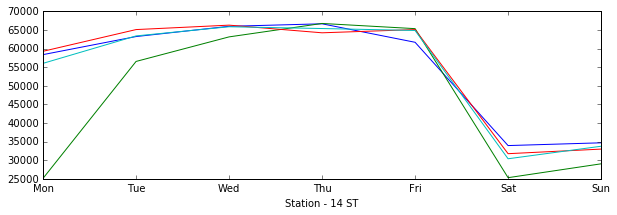

In [92]:
#Challenge 8
%matplotlib inline
#['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME','DESC', 'ENTRIES','EXITS']     

d160528 = challenge6_by_STATION('turnstile_160528.txt')
d160604 = challenge6_by_STATION('turnstile_160604.txt')
d160611 = challenge6_by_STATION('turnstile_160611.txt')
d160618 = challenge6_by_STATION('turnstile_160618.txt')

list_of_dict = [d160528, d160604 , d160611, d160618 ]

name = '14 ST'

fig = plt.figure(figsize=(10,3))

for d in list_of_dict:

    weekdays = sorted([[v[0].weekday(),v[1]] for v in d[name]], key = lambda x: x[0])
    
    dates = [v[0] for v in weekdays]
    counts = [v[1] for v in weekdays]
    plt.plot(dates,counts)
    plt.xticks(dates, [ 'Mon','Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation='horizontal')
    plt.xlabel('Station - ' + name)


In [100]:
#Challenges 9 and 10
newdict.clear()
sorted_dict.clear()
d_stations.clear()
d_stations= defaultdict(list)
newdict = defaultdict(list)
sorted_dict = defaultdict(list)

#merge dictionaries
for d in list_of_dict:
    for k,v in d.items():
        byweekday = [[x[0].weekday(),x[1]] for x in v]
        newdict[k].extend(byweekday)
        
#aggregate by day of the week
for k,v in newdict.items():
        
        #sort dictionary values by date(prepare to use groupby())
        sortedlist = sorted(v, key = lambda x: x[0])
        
        #groupby the date, sum up accross dates
        for i,g in itertools.groupby(sortedlist, key = lambda x: x[0]):
            dayrec = list(g)
            date = dayrec[0][0]
            entries = sum([x[1] for x in dayrec])
            d_stations[k].append([date, entries])
            
def busy_station(day):
    
    stations=[]
    
    for k,v in sorted(d_stations.items(), key = lambda x: x[1][day][1], reverse = True):
        stations.append([k, v[day][1]])
        
    return(stations)

DAY_OF_THE_WEEK = 2

stations = busy_station(DAY_OF_THE_WEEK)

for i in range(10):
    print(stations[i])

['34 ST-PENN STA', 730660]
['GRD CNTRL-42 ST', 675183]
['34 ST-HERALD SQ', 510549]
['23 ST', 494480]
['86 ST', 472168]
['14 ST-UNION SQ', 449515]
['TIMES SQ-42 ST', 410314]
['42 ST-PORT AUTH', 380751]
['FULTON ST', 363010]
['59 ST', 344008]


(array([ 290.,   46.,   18.,    5.,    6.,    2.,    4.,    0.,    0.,    2.]),
 array([  1.60000000e+01,   7.30804000e+04,   1.46144800e+05,
          2.19209200e+05,   2.92273600e+05,   3.65338000e+05,
          4.38402400e+05,   5.11466800e+05,   5.84531200e+05,
          6.57595600e+05,   7.30660000e+05]),
 <a list of 10 Patch objects>)

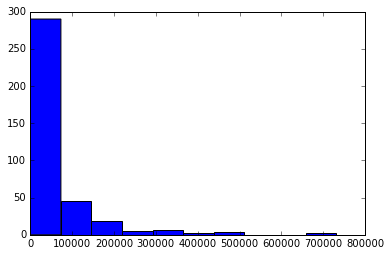

In [103]:
import plotly.plotly as py  # tools to communicate with Plotly's server

histogram=plt.figure()

values = [x[1] for x in stations]
plt.hist(values)
